In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

''' Instruções para acesso a base de dados:
1. Acessar https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados
2. Clicar na aba "Recursos"
3. Baixar todos os arquivos mensais de algum ano (só clicar em acessar recurso que irá baixar o arquivo)
4. Fazer o upload aqui no collab
'''

''' Faz a leitura dos dados, recebe o path do arquivo e remove 3 colunas desprezíveis no arquivo: Ano e mês
Os arquivos são criados mensalmente, por isso as colunas se tornam desprezíveis.
Também salva a nova base de dados em uma pasta na raiz do diretório'''
def industrialized_data(path, rows_to_be_deleted, file_name):
    #ler o arquivo, forçando o encoding certo, com os dados separados por ; e pulando o header
    data = pd.read_csv('./content/2021/EDA_Industrializados_' + path, encoding='ISO-8859-1', sep=';', skiprows=1, dtype={"CID10": "string"})
    #remove colunas não necessárias na leitura
    data.drop(data.columns[rows_to_be_deleted], axis=1, inplace=True)

    #salva a nova base de dados
    df = pd.DataFrame(data)
    filepath = Path('./content/new_datas/' + file_name)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(filepath)

    return data.values

In [4]:
''' Cria um gráfico do tipo pizza, recebendo os valores a serem calculados,
as chaves que devem aparecer nos labels e o titulo do grafico '''
def create_pie_plot(values, keys, title):
    plt.pie(values, labels=keys, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [6]:

''' Plota o gráfico para os 5 medicamentos mais vendidos '''
def top_five_selled_by_qnty(five_most_selled):
    # deve-se criar um novo dicionário ordenado de forma decrescente para filtras os 5 mais vendidos
    five_best_sellers = dict(sorted(five_most_selled.items(), key=lambda item:item[1], reverse=True)[:5])
    fig, ax = plt.subplots(figsize=(8, 6))
    #cria um gráfico do tipo bar
    plt.bar(five_best_sellers.keys(), five_best_sellers.values())

    # remove o frame do gráfico
    ax.set_frame_on(False)
    # remove o y do gráfico, ja que vamos mostrar o valor em cima da barra
    ax.get_yaxis().set_visible(False)
    ax.set_title('5 medicamentos mais vendidos no Brasil', loc='center',
                 pad=40, fontdict={'fontsize': 20})
    ax.tick_params(axis='x', length=0, labelsize=18)

    # faz com que os retângulos do resultado recebam uma label logo acima da sua altura de forma centralizada
    for ret in ax.patches:
        ax.text(ret.get_x() + ret.get_width() / 2,
                ret.get_height() + 80,
                '{:,}'.format(int(ret.get_height())).replace(',', '.'),
                ha='center',
                fontsize=16)

    # as labels de X são rotacionadas em 90 graus para melhor leitura do nome do principio ativo do medicamento
    plt.xticks(rotation=90)
    plt.show()

In [7]:
''' Cria um dicionário de forma mais genérica para as regiões '''
def create_dict_by_region(dic, state, value):
    north = ['AM', 'PA', 'RR', 'AC', 'RO', 'AP', 'TO']
    south = ['PR', 'SC', 'RS']
    midwest = ['MT', 'MS', 'GO', 'DF']
    northeast = ['BA', 'CE', 'MA', 'PB', 'PE', 'RN', 'SE', 'AL', 'PI']
    southeast = ['SP', 'RJ', 'MG', 'ES']

    if (state in north):
        dic['Norte'] += value
    if (state in south):
        dic['Sul'] += value
    if (state in midwest):
        dic['Centro-Oeste'] += value
    if (state in northeast):
        dic['Nordeste'] += value
    if (state in southeast):
        dic['Sudeste'] += value

In [8]:
''' Plota gráfico para os 3 municípios com maior venda no Brasil'''
def three_mun_bigger_sales_graph(qnty_sold_by_mun):
    three_mun_with_bigger_sales = dict(sorted(qnty_sold_by_mun.items(), key=lambda item:item[1], reverse=True)[:3])

    fig, ax1 = plt.subplots(figsize=(8, 6))
    x = list(three_mun_with_bigger_sales.values())
    y = list(three_mun_with_bigger_sales.keys())
    # cria barra invertida
    ax1.barh(y, width=x, align='center', height=0.5)
    ax1.set_title('Quais os 3 primeiros municipios com maior venda de medicamento?', loc='center', fontdict={'fontsize': 20})
    # cria grid dentro do frame para melhor visualização do posicionamento
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # cria os valores do lado direito do frame
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(np.arange(len(three_mun_with_bigger_sales)), labels=[qnty for qnty in three_mun_with_bigger_sales.values()])

    plt.show()

In [9]:
''' Cria formato em milhão para o gráfico de projeção anual  '''
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f}M'.format(x*1e-7)

''' Retorna a quantidade total de vendas por mês '''
def get_qnt_sold(year, month):
    columns_to_be_removed = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]
    return sum(industrialized_data(year + month, columns_to_be_removed, year + month +'_quantity_sold_data.csv'))[0]

''' Plota o gráfico de projeção anual '''
def plot_annual_sales_projection(path):
    year_and_month = path.split('.')[0]
    year = year_and_month[0:4]
    annual_sales = {'Jan': get_qnt_sold(year,'01.csv'), 'Fev': get_qnt_sold(year, '02.csv'),
                    'Mar': get_qnt_sold(year, '03.csv'), 'Abr': get_qnt_sold(year, '04.csv'),
                    'Mai': get_qnt_sold(year, '05.csv'), 'Jun': get_qnt_sold(year, '06.csv'),
                    'Jul': get_qnt_sold(year, '07.csv'), 'Ago': get_qnt_sold(year, '08.csv'),
                    'Set': get_qnt_sold(year, '09.csv'), 'Out': get_qnt_sold(year, '10.csv'),
                    'Nov': get_qnt_sold(year, '11.csv'), 'Dez': get_qnt_sold(year, '12.csv')}

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.set_title('Qual a projeção de venda anual dos medicamentos?', loc='center', fontdict={'fontsize': 20})
    ax.plot(annual_sales.keys(), annual_sales.values(), '.-')
    ax.set_xlabel('Meses')

    #configura y
    ax.set_ylabel('Quantidade total de vendas')
    ax.yaxis.set_major_formatter(millions)
    ax.yaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    plt.show()


In [36]:
#Gerando gráfico dos gêneros
def gender_graph(dict, gender):

    list_sorted = sorted(list(dict.items()), key=lambda x:x[1], reverse=True)[:3]

    keys, values = zip(*list_sorted)

    plt.barh(keys, values)

    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Medicamento')

    plt.title('Medicamentos mais consumidos por ' + gender)

    plt.show()

In [20]:
#Consumo de insumos por gênero
def consumer_gender(path):
  data = industrialized_data(path, [0,1,2,3,5,7,8,9,10,11,13,14], 'most_medications_by_brazilian_state.csv')
  gender_data = pd.DataFrame(data, columns=['PRINCIPIO_ATIVO','QTD_VENDIDA', "SEXO" ])

  gender_grouped = gender_data.groupby(['SEXO', 'PRINCIPIO_ATIVO'])['QTD_VENDIDA'].sum()
  gender_grouped = gender_grouped.sort_values(ascending=False)
  man_dict = dict()
  women_dict = dict()

  for sex, name in gender_grouped.keys():
    if (sex==1 and name not in man_dict):
      man_dict[name] = gender_grouped[sex, name]
    
    elif (sex==2 and name not in women_dict):
      women_dict[name] = gender_grouped[sex, name]

  gender_graph(man_dict, 'Homens')
  gender_graph(women_dict, 'Mulheres')

In [30]:
# Pergunta 4: Quais os medicamentos mais utilizados por estado?
def most_medications_by_brazilian_state(path):
  data = industrialized_data(path, [0,1,3,5,7,8,9,10,11,12,13,14], 'most_medications_by_brazilian_state.csv')
  df = pd.DataFrame(data, columns=['UF_VENDA', 'PRINCIPIO_ATIVO','QTD_VENDIDA'])

  vendas_estado = df.groupby(['UF_VENDA', 'PRINCIPIO_ATIVO'])['QTD_VENDIDA'].sum()
  vendas_estado = vendas_estado.sort_values(ascending=False)
  mais_vendido_estado_dict = dict()

  for uf, name in vendas_estado.keys():
    if (uf not in mais_vendido_estado_dict):
      mais_vendido_estado_dict[uf] = name

  return mais_vendido_estado_dict

In [29]:

# Monta o gráfico para exibição dos medicamentos por estado
def render_medicines_brazil_graph(render_data):
    import json
    import folium

    states_json = json.load(open('./content/brazil_geo.json'))
    mapa = folium.Map(location=['-14.4095261118','-51.3166801087'], zoom_start=4, width=600,height=600)

    folium.GeoJson(states_json).add_to(mapa)

    colors_map = {
      'CLONAZEPAM': 'red',
      'CEFALEXINA MONOIDRATADA': 'yellow',
      'AZITROMICINA DI-HIDRATADA': 'turquoise',
      'CLORIDRATO DE METILFENIDATO': 'pink',
      'HEMITARTARATO DE ZOLPIDEM': 'orange',
      'DEXAMETASONA + TOBRAMICINA': 'green',
      'OXALATO DE ESCITALOPRAM': 'purple',
      'VALPROATO DE SÓDIO': 'gray',
      'CEFALEXINA': 'yellow',
      'SOMATROPINA': 'white',
      'ALPRAZOLAM': 'red',
      'CARBONATO DE LÍTIO': 'yellow',
      'HEMIFUMARATO DE QUETIAPINA': 'turquoise',
      'UNDECILATO DE TESTOSTERONA': 'pink',
      'DECANOATO DE NANDROLONA': 'orange'
  }

    folium.GeoJson(
      states_json,
      style_function= lambda x: {
          'fillColor': colors_map[render_data[x['id']]],
          'weight': '0.3',
          'fillOpacity': 0.7,
      }
  ).add_to(mapa)

    return mapa

In [14]:
''' Cria os principais gráficos com duas informações importantes dos dados:
1 - Porcentagem de medicamentos vendidos por região
2 - Top 5 medicamentos vendidos no Brasil '''
def required_graphs(path):
    meds = industrialized_data(path, [0, 1, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14], 'required_graphs_data.csv')

    # estado iniciais dos dicionários a serem usados
    most_selled_in_Brazil = dict()
    qtySold_by_region = {'Norte': 0, 'Sul': 0, 'Centro-Oeste': 0, 'Nordeste': 0, 'Sudeste': 0}

    # loop de interação pelos dados
    for data in meds:
        state = data[0]
        qty_Sold = data[2]
        med = data[1]

        # condição que preenche o dicionário para o top 5 mais vendidos
        if(med in most_selled_in_Brazil.keys()):
            most_selled_in_Brazil[med] += qty_Sold
        else:
            most_selled_in_Brazil[med] = qty_Sold

        # cria o dicionário a partir da quantidade vendida das regiões
        create_dict_by_region(qtySold_by_region, state, qty_Sold)


    # chama os métoso que plota cada gráfico obrigatório
    create_pie_plot(qtySold_by_region.values(), qtySold_by_region.keys(), 'Porcentagem de medicamentos vendidos por região')
    top_five_selled_by_qnty(most_selled_in_Brazil)

In [15]:
''' Cria gráficos adicionais que satisfaz 4 perguntas:
1 - Qual a porcentagem de medicamentos vendidos em caixa por conselho prescritor?
2 - Quais os 3 primeiros municipios com maior venda de medicamento?
3 - Qual a projeção de venda anual dos medicamentos? 
4 - Qual os três medicamentos mais consumidos por gênero? '''

def additional_grapshs(path):
    meds = industrialized_data(path, [0, 1, 2, 4, 5, 9, 10, 11, 12, 13, 14], 'additional_graphs_data.csv')

    # dic para a primeira pergunta
    box_solds_by_council = dict()
    # dic para a segunda pergunta
    qnty_sold_by_mun = dict()

    for data in meds:
        metric = data[2]
        council = data[3]
        qty_Sold = data[1]
        municipality = data[0]

        # condição de apenas pegar os medicamentos de caixa para preencher o dic com as caixas mais vendidas por conselho prescritor
        if(metric == 'CAIXA'):
            if(council in box_solds_by_council.keys()):
                box_solds_by_council[council] += 1
            else:
                box_solds_by_council[council] = 1

        # condição para criar os dados com os 3 municipios com maiores venda
        if(municipality in qnty_sold_by_mun.keys()):
            qnty_sold_by_mun[municipality] += qty_Sold
        else:
            qnty_sold_by_mun[municipality] = qty_Sold

    result = most_medications_by_brazilian_state(path)


    #plota os gráficos das perguntas
    create_pie_plot(box_solds_by_council.values(), box_solds_by_council.keys(), 'Qual a porcentagem de medicamentos vendidos em caixa por conselho prescritor?')
    three_mun_bigger_sales_graph(qnty_sold_by_mun)
    plot_annual_sales_projection(path)
    consumer_gender(path)
    render_medicines_brazil_graph(result)

RELATÓRIO VENDAS DE MEDICAMENTOS CONTROLADOS INDUSTRIALIZADOS


In [ ]:

print("Bem vindo ao relatório de produtos controlados ano/base 2021")
mes= input("Digte o número do mês para o qual você quer gerar o relatório (ex. 01 p/ janeiro)? ")

Bem vindo ao relatório de produtos controlados ano/base 2021


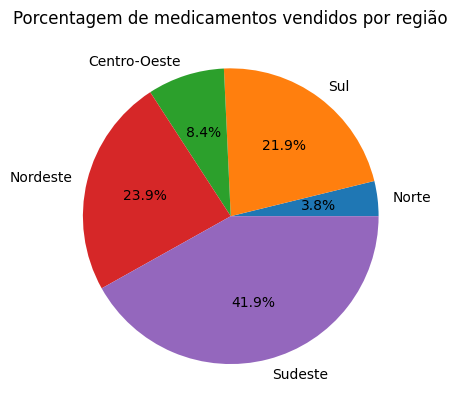

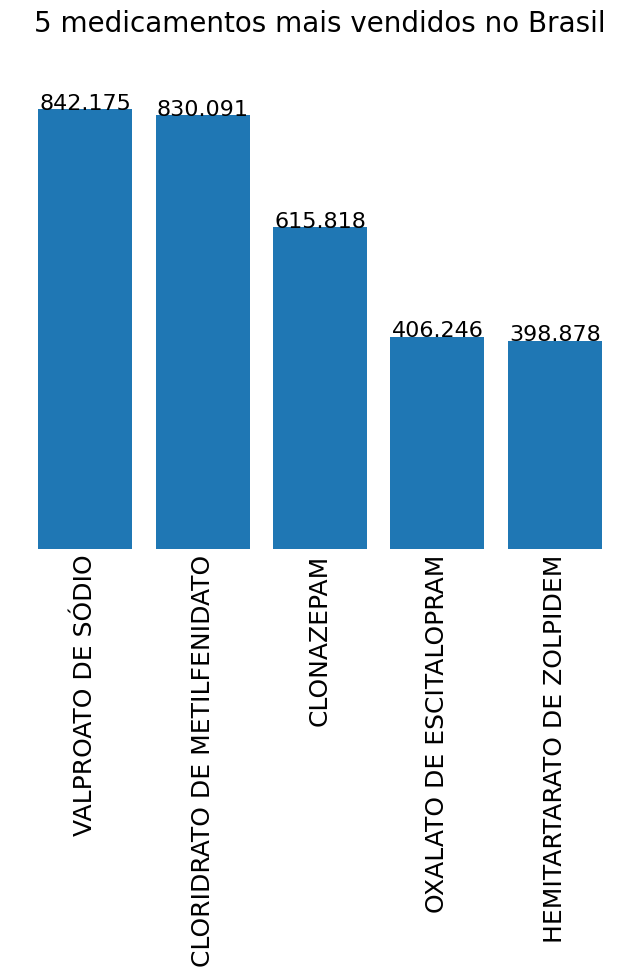

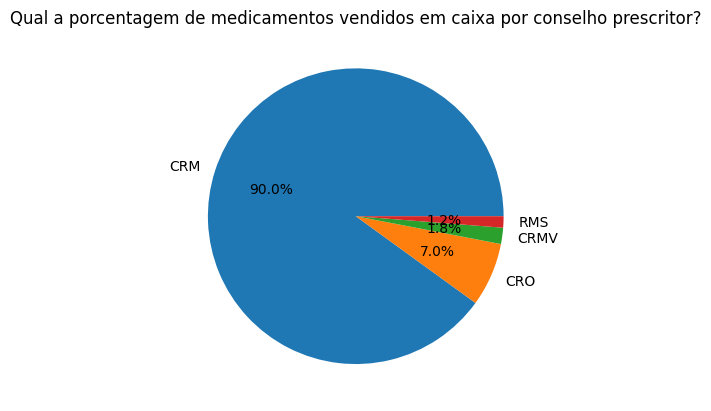

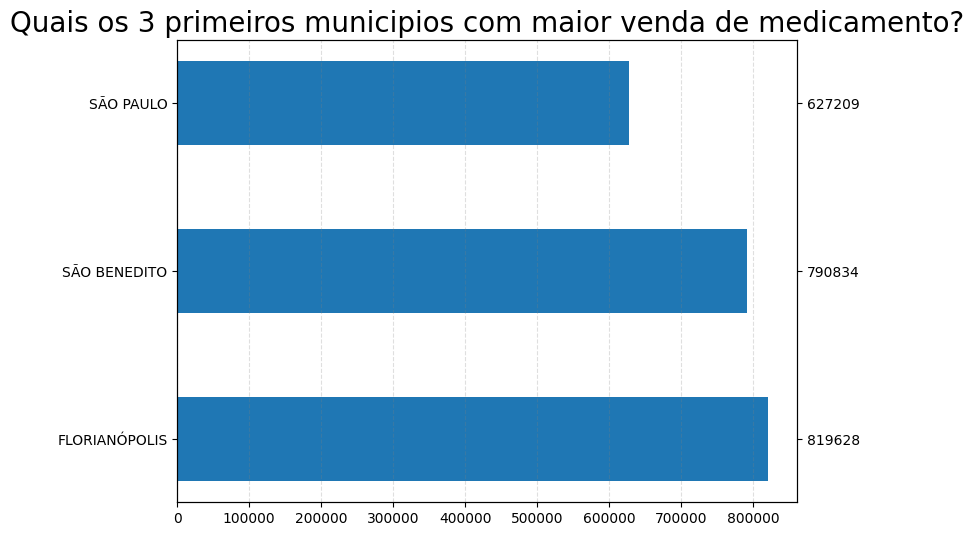

C:\Users\anne\AppData\Local\Temp\ipykernel_9208\4274860864.py:18: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./content/2021/EDA_Industrializados_' + path, encoding='ISO-8859-1', sep=';', skiprows=1, dtype={"CID10": "string"})
C:\Users\anne\AppData\Local\Temp\ipykernel_9208\4274860864.py:18: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./content/2021/EDA_Industrializados_' + path, encoding='ISO-8859-1', sep=';', skiprows=1, dtype={"CID10": "string"})
C:\Users\anne\AppData\Local\Temp\ipykernel_9208\4274860864.py:18: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./content/2021/EDA_Industrializados_' + path, encoding='ISO-8859-1', sep=';', skiprows=1, dtype={"CID10": "string"})
C:\Users\anne\AppData\Local\Temp\ipykernel_9208\4274860864.py:18: DtypeWarning: Co

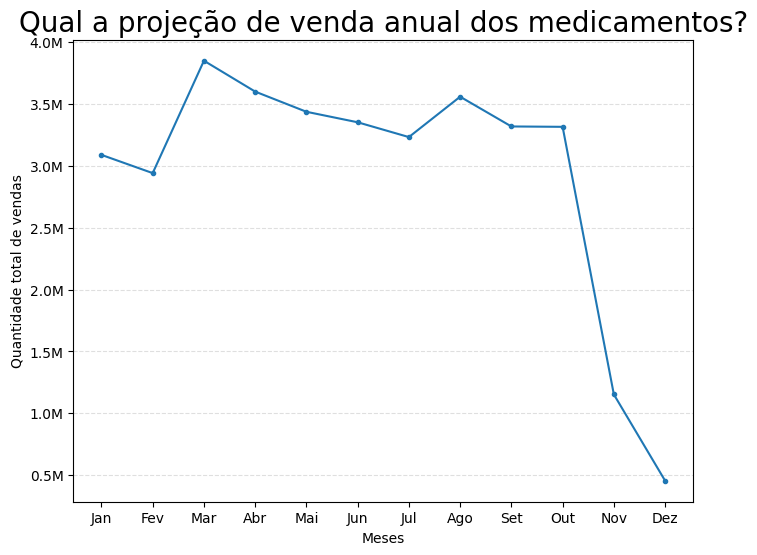

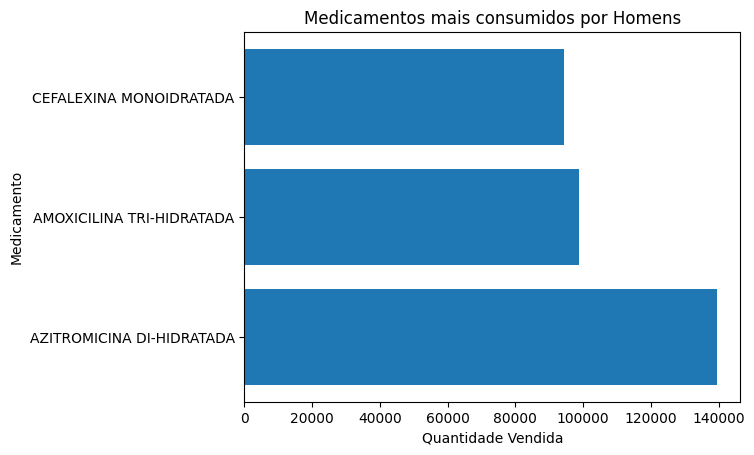

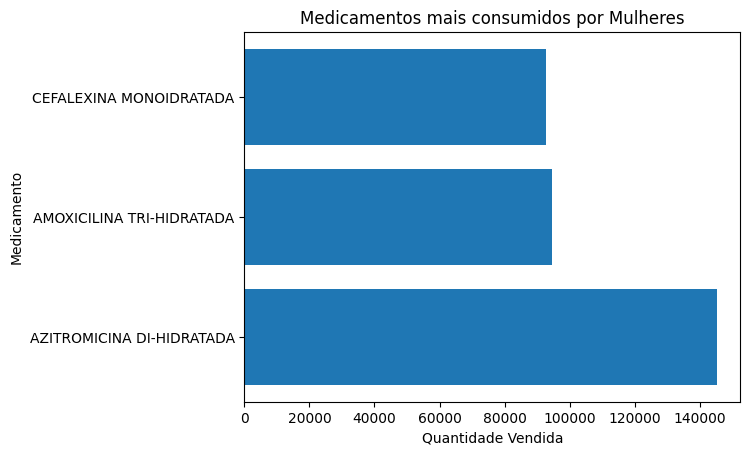

In [37]:
''' Gera relatório '''

required_graphs(f'2021{mes}.csv')
additional_grapshs(f'2021{mes}.csv')